<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#INSTALAR SIMPY
!pip install simpy
#LIBRERIAS
import simpy
import random
import matplotlib.pyplot as plt


# **Introducción**

**SimPy** es una librería de simulación de eventos discretos que permite modelar sistemas complejos y dinámicos mediante la representación de procesos y eventos aleatorios. En el **contexto del fútbol**, SimPy se puede utilizar para **simular los goles anotados** por un equipo **con el promedio de goles anotados** durante un partido que tiene previamente ese equipo con el rendimiento.

# **Funciones**

## **FUNCIÓN QUE SIMULA LOS GOLES DE UN EQUIPO EN UN PARTIDO**

In [22]:
def equipo(env, nombre, goles_promedio, resultado):
    # nombre -> Nombre del equipo que anotara gol
    # goles_promedio -> Promedio de goles que hace un equipo en un partido de 90 minutos(en minutos)
    # resultado -> Total de goles que anota un equipo en 90 minutos
    while True:
        # tiempo_entre_goles -> Simula el tiempo cuando un equipo anota gol
        tiempo_entre_goles = random.expovariate(1 / goles_promedio)
        yield env.timeout(tiempo_entre_goles)
        # resultado -> Suma un gol al resultado
        resultado[nombre] += 1
        print(f"{nombre} anota un gol en el minuto {env.now:.2f}. Total goles: {resultado[nombre]}")

## **FUNCIÓN QUE SIMULA LOS GOLES DE DOS EQUIPOS EN UN PARTIDO**

In [23]:
def simular_partido(goles_equipo_local,goles_equipo_visitante,duracion_partido):

    # goles_equipo_local -> Goles que en promedio anota el equipo local (en minutos)
    # goles_equipo_visitante -> Goles que en promedio anota el equipo visitante (en minutos)
    # duracion_partido -> Duracion del partido en minutos (90)
    # Inicializa el entorno de simulación
    env = simpy.Environment()
    # resultado -> Almacena el resultado
    resultado = {'Local': 0, 'Visitante': 0}
    # Crear procesos para los dos equipos
    env.process(equipo(env, 'Local', goles_equipo_local, resultado))
    env.process(equipo(env, 'Visitante', goles_equipo_visitante, resultado))

    # Simular el partido por la duración especificada
    env.run(until=duracion_partido)

    # Mostrar el resultado final
    print(f"\nResultado final: {resultado['Local']} - {resultado['Visitante']}")

## **EJEMPLO:**

In [24]:
# Parámetros de entrada
goles_promedio_equipo_local = 58.6  # Goles promedio por partido del Equipo Local (en minutos)
goles_promedio_equipo_visitante = 58.44  # Goles promedio por partido del Equipo Visitante (en minutos)
duracion_partido = 90  # Duración del partido en minutos

# Ejecutar la simulación
simular_partido(goles_promedio_equipo_local, goles_promedio_equipo_visitante, duracion_partido)


Local anota un gol en el minuto 17.86. Total goles: 1
Local anota un gol en el minuto 69.63. Total goles: 2

Resultado final: 2 - 0


# **SIMULANDO LA JORNADA 15 DE LA LIGA MX**



In [25]:
# FUNCION ACTUALIZADA PARA QUE NO MUESTRE EN QUE MINUTO SE ANOTO EL GOL, SOLO LO CUENTE
def equipo(env, nombre, goles_promedio, resultado):
    # nombre -> Nombre del equipo que anotara gol
    # goles_promedio -> Promedio de goles que hace un equipo en un partido de 90 minutos(en minutos)
    # resultado -> Total de goles que anota un equipo en 90 minutos
    while True:
        # tiempo_entre_goles -> Simula el tiempo cuando un equipo anota gol
        tiempo_entre_goles = random.expovariate(1 / goles_promedio)
        yield env.timeout(tiempo_entre_goles)
        # resultado -> Suma un gol al resultado
        resultado[nombre] += 1

def simular_partido(goles_equipo_local,goles_equipo_visitante,duracion_partido):
    # goles_equipo_local -> Goles que en promedio anota el equipo local (en minutos)
    # goles_equipo_visitante -> Goles que en promedio anota el equipo visitante (en minutos)
    # duracion_partido -> Duracion del partido en minutos (90)
    # Inicializa el entorno de simulación
    env = simpy.Environment()
    # resultado -> Almacena el resultado
    resultado = {'Local': 0, 'Visitante': 0}
    # Crear procesos para los dos equipos
    env.process(equipo(env, 'Local', goles_equipo_local, resultado))
    env.process(equipo(env, 'Visitante', goles_equipo_visitante, resultado))

    # Simular el partido por la duración especificada
    env.run(until=duracion_partido)
    # Mostrar el resultado final
    print(f"\nResultado final: {resultado['Local']} - {resultado['Visitante']}")
    # Determinar el ganador
    # Si el local gana -> res = 1
    if resultado['Local'] > resultado['Visitante']:
        res=1
    # Si el visitante gana -> res = 2
    elif resultado['Visitante'] > resultado['Local']:
        res=2
    # Si hay empate -> res = 0
    else:
        res = 0
    return res

**DATOS DE LA JORNADA**

In [26]:
# Parámetros de entrada
# duracion_partido -> Los partidos duran 90 minutos sin considerar los tiempos agregados a cada tiempo
duracion_partido = 90
#Equipos_locales -> Nombre de los equipos locales en esta jornada
Equipos_locales =["CRUZ AZUL","PACHUCA","MONTERREY","GUADALAJARA","TOLUCA","SAN LUIS","TIJUANA","MAZATLAN","QUERETARO"]
Equipos_visitantes =["SANTOS","NECAXA","ATLAS","PUMAS","LEON","PUEBLA","TIGRES","AMERICA","JUAREZ"]
Locales = [30.30,76.27,60,63.83,40.18, 56.6,65.22, 152.54, 118.42]
Visitantes = [126.76, 72, 84.91, 72.58, 72, 90, 61.22, 56.60,69.77]

# Ejecutar la simulación para cada par de equipos
#resul -> Guarda el resultado de cada partido
# Si res = 1 -> Ganó local , res = 2 -> Ganó visitante . res = 0 -> Hubó empate
resul=[]
for i in range(len(Locales)):
    print(f"\nSimulando partido {i + 1}:")
    print(Equipos_locales[i],"vs",Equipos_visitantes[i])
    resul.append(simular_partido(Locales[i], Visitantes[i], duracion_partido))




Simulando partido 1:
CRUZ AZUL vs SANTOS

Resultado final: 2 - 1

Simulando partido 2:
PACHUCA vs NECAXA

Resultado final: 3 - 0

Simulando partido 3:
MONTERREY vs ATLAS

Resultado final: 0 - 2

Simulando partido 4:
GUADALAJARA vs PUMAS

Resultado final: 0 - 3

Simulando partido 5:
TOLUCA vs LEON

Resultado final: 1 - 3

Simulando partido 6:
SAN LUIS vs PUEBLA

Resultado final: 4 - 0

Simulando partido 7:
TIJUANA vs TIGRES

Resultado final: 0 - 3

Simulando partido 8:
MAZATLAN vs AMERICA

Resultado final: 1 - 2

Simulando partido 9:
QUERETARO vs JUAREZ

Resultado final: 1 - 1


## **SIMULANDO N VECES LA JORNADA 15 OBTENIENDO EL PORCENTAJE DE VECES QUE GANÓ EL LOCAL O EL VISITANTE O HUBO EMPATE.**

In [27]:
def simular_partido(goles_equipo_local,goles_equipo_visitante,duracion_partido):
    # goles_equipo_local -> Goles que en promedio anota el equipo local (en minutos)
    # goles_equipo_visitante -> Goles que en promedio anota el equipo visitante (en minutos)
    # duracion_partido -> Duracion del partido en minutos (90)
    # Inicializa el entorno de simulación
    env = simpy.Environment()
    # resultado -> Almacena el resultado
    resultado = {'Local': 0, 'Visitante': 0}
    # Crear procesos para los dos equipos
    env.process(equipo(env, 'Local', goles_equipo_local, resultado))
    env.process(equipo(env, 'Visitante', goles_equipo_visitante, resultado))

    # Simular el partido por la duración especificada
    env.run(until=duracion_partido)
    # Mostrar el resultado final
    # Determinar el ganador
    # Si el local gana -> res = 1
    if resultado['Local'] > resultado['Visitante']:
        res=1
    # Si el visitante gana -> res = 2
    elif resultado['Visitante'] > resultado['Local']:
        res=2
    # Si hay empate -> res = 0
    else:
        res = 0
    return res

# Parámetros de entrada
# duracion_partido -> Los partidos duran 90 minutos sin considerar los tiempos agregados a cada tiempo
duracion_partido = 90
#Equipos_locales -> Nombre de los equipos locales en esta jornada
Equipos_locales =["CRUZ AZUL","PACHUCA","MONTERREY","GUADALAJARA","TOLUCA","SAN LUIS","TIJUANA","MAZATLAN","QUERETARO"]
Equipos_visitantes =["SANTOS","NECAXA","ATLAS","PUMAS","LEON","PUEBLA","TIGRES","AMERICA","JUAREZ"]
Locales = [58.63, 97.3, 74.07, 50.42, 52.33, 72, 70.87, 78.6, 44.23]
Visitantes = [58.44, 76.27, 64.52, 83.72, 76.27, 78.6, 79.3, 61.64,133.3]

# Ejecutar la simulación para cada partido N veces
# R_partidon -> Resultados del partido n con n=1,2,3,4,5,6,7,8,9
R_partido1=[]
R_partido2=[]
R_partido3=[]
R_partido4=[]
R_partido5=[]
R_partido6=[]
R_partido7=[]
R_partido8=[]
R_partido9=[]
# N -> Número de veces que se repite la simulación
N = 50
for j in range(N):
  resul=[]
  for i in range(len(Locales)):
      resul.append(simular_partido(Locales[i], Visitantes[i], duracion_partido))
  R_partido1.append(resul[0])
  R_partido2.append(resul[1])
  R_partido3.append(resul[2])
  R_partido4.append(resul[3])
  R_partido5.append(resul[4])
  R_partido6.append(resul[5])
  R_partido7.append(resul[6])
  R_partido8.append(resul[7])
  R_partido9.append(resul[8])
#P_V -> PORCENTAJE DE QUE GANE EL LOCAL DE CADA PARTIDO
P_L=[]
#P_V -> PORCENTAJE DE QUE GANE EL VISITANTE DE CADA PARTIDO
P_V=[]
#P_E -> PORCENTAJE DEL EMPATE DE CADA PARTIDO
PE=[]
#Calculamos porcentaje de victorias de locales, visitantes o empates.
#Partido 1
G_L=R_partido1.count(1)/len(R_partido1)
P_L.append(G_L)
G_V=R_partido1.count(2)/len(R_partido1)
P_V.append(G_V)
G_E=R_partido1.count(0)/len(R_partido1)
PE.append(G_E)
#Partido 2
G_L=R_partido2.count(1)/len(R_partido2)
P_L.append(G_L)
G_V=R_partido2.count(2)/len(R_partido2)
P_V.append(G_V)
G_E=R_partido2.count(0)/len(R_partido2)
PE.append(G_E)
#Partido 3
G_L=R_partido3.count(1)/len(R_partido3)
P_L.append(G_L)
G_V=R_partido3.count(2)/len(R_partido3)
P_V.append(G_V)
G_E=R_partido3.count(0)/len(R_partido3)
PE.append(G_E)
#Partido 4
G_L=R_partido4.count(1)/len(R_partido4)
P_L.append(G_L)
G_V=R_partido4.count(2)/len(R_partido4)
P_V.append(G_V)
G_E=R_partido4.count(0)/len(R_partido4)
PE.append(G_E)
#Partido 5
G_L = R_partido5.count(1) / len(R_partido5)
P_L.append(G_L)
G_V = R_partido5.count(2) / len(R_partido5)
P_V.append(G_V)
G_E = R_partido5.count(0) / len(R_partido5)
PE.append(G_E)
#Partido 6
G_L = R_partido6.count(1) / len(R_partido6)
P_L.append(G_L)
G_V = R_partido6.count(2) / len(R_partido6)
P_V.append(G_V)
G_E = R_partido6.count(0) / len(R_partido6)
PE.append(G_E)
#Partido 7
G_L = R_partido7.count(1) / len(R_partido7)
P_L.append(G_L)
G_V = R_partido7.count(2) / len(R_partido7)
P_V.append(G_V)
G_E = R_partido7.count(0) / len(R_partido7)
PE.append(G_E)
#Partido 8
G_L = R_partido8.count(1) / len(R_partido8)
P_L.append(G_L)
G_V = R_partido8.count(2) / len(R_partido8)
P_V.append(G_V)
G_E = R_partido8.count(0) / len(R_partido8)
PE.append(G_E)
#Partido 9
G_L = R_partido9.count(1) / len(R_partido9)
P_L.append(G_L)
G_V = R_partido9.count(2) / len(R_partido9)
P_V.append(G_V)
G_E = R_partido9.count(0) / len(R_partido9)
PE.append(G_E)

**GRÁFICA DE RESULTADOS**

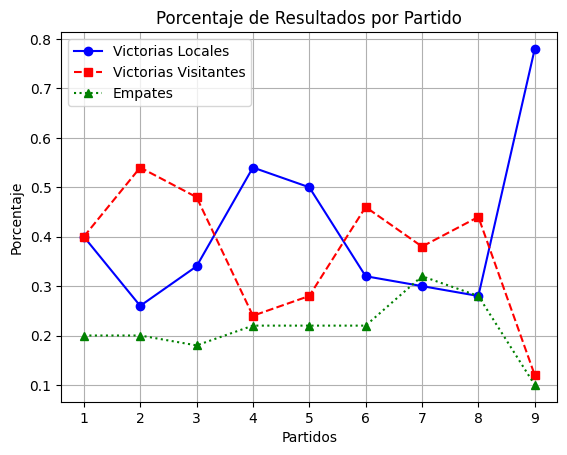

In [28]:
# partidos -> Número del partido
partidos = [1,2,3,4,5,6,7,8,9]

# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(partidos, P_L, label='Victorias Locales', marker='o', linestyle='-', color='b')
plt.plot(partidos, P_V, label='Victorias Visitantes', marker='s', linestyle='--', color='r')
plt.plot(partidos, PE, label='Empates', marker='^', linestyle=':', color='g')

# Etiquetas y título de la gráfica
plt.xlabel('Partidos')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Resultados por Partido')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

**SIMULAR M REPETIDAS VECES LAS N VECES DE LA JORNADA 5**

In [29]:
m= 1000
# Pn -> Porcentajes de partido n
P1L=[]
P1V=[]
P1E=[]
P2L=[]
P2V=[]
P2E=[]
P3L=[]
P3V=[]
P3E=[]
P4L=[]
P4V=[]
P4E=[]
P5L=[]
P5V=[]
P5E=[]
P6L=[]
P6V=[]
P6E=[]
P7L=[]
P7V=[]
P7E=[]
P8L=[]
P8V=[]
P8E=[]
P9L=[]
P9V=[]
P9E=[]
for k in range(m):
  # R_partidon -> Resultados del partido n con n=1,2,3,4,5,6,7,8,9
  R_partido1=[]
  R_partido2=[]
  R_partido3=[]
  R_partido4=[]
  R_partido5=[]
  R_partido6=[]
  R_partido7=[]
  R_partido8=[]
  R_partido9=[]
  # N -> Número de veces que se repite la simulación
  N = 50
  for j in range(N):
    resul=[]
    for i in range(len(Locales)):
        resul.append(simular_partido(Locales[i], Visitantes[i], duracion_partido))
    R_partido1.append(resul[0])
    R_partido2.append(resul[1])
    R_partido3.append(resul[2])
    R_partido4.append(resul[3])
    R_partido5.append(resul[4])
    R_partido6.append(resul[5])
    R_partido7.append(resul[6])
    R_partido8.append(resul[7])
    R_partido9.append(resul[8])
  #P_V -> PORCENTAJE DE QUE GANE EL LOCAL DE CADA PARTIDO
  P_L=[]
  #P_V -> PORCENTAJE DE QUE GANE EL VISITANTE DE CADA PARTIDO
  P_V=[]
  #P_E -> PORCENTAJE DEL EMPATE DE CADA PARTIDO
  PE=[]
  #Calculamos porcentaje de victorias de locales, visitantes o empates.
  #Partido 1
  G_L=R_partido1.count(1)/len(R_partido1)
  P_L.append(G_L)
  G_V=R_partido1.count(2)/len(R_partido1)
  P_V.append(G_V)
  G_E=R_partido1.count(0)/len(R_partido1)
  PE.append(G_E)
  #Partido 2
  G_L=R_partido2.count(1)/len(R_partido2)
  P_L.append(G_L)
  G_V=R_partido2.count(2)/len(R_partido2)
  P_V.append(G_V)
  G_E=R_partido2.count(0)/len(R_partido2)
  PE.append(G_E)
  #Partido 3
  G_L=R_partido3.count(1)/len(R_partido3)
  P_L.append(G_L)
  G_V=R_partido3.count(2)/len(R_partido3)
  P_V.append(G_V)
  G_E=R_partido3.count(0)/len(R_partido3)
  PE.append(G_E)
  #Partido 4
  G_L=R_partido4.count(1)/len(R_partido4)
  P_L.append(G_L)
  G_V=R_partido4.count(2)/len(R_partido4)
  P_V.append(G_V)
  G_E=R_partido4.count(0)/len(R_partido4)
  PE.append(G_E)
  #Partido 5
  G_L = R_partido5.count(1) / len(R_partido5)
  P_L.append(G_L)
  G_V = R_partido5.count(2) / len(R_partido5)
  P_V.append(G_V)
  G_E = R_partido5.count(0) / len(R_partido5)
  PE.append(G_E)
  #Partido 6
  G_L = R_partido6.count(1) / len(R_partido6)
  P_L.append(G_L)
  G_V = R_partido6.count(2) / len(R_partido6)
  P_V.append(G_V)
  G_E = R_partido6.count(0) / len(R_partido6)
  PE.append(G_E)
  #Partido 7
  G_L = R_partido7.count(1) / len(R_partido7)
  P_L.append(G_L)
  G_V = R_partido7.count(2) / len(R_partido7)
  P_V.append(G_V)
  G_E = R_partido7.count(0) / len(R_partido7)
  PE.append(G_E)
  #Partido 8
  G_L = R_partido8.count(1) / len(R_partido8)
  P_L.append(G_L)
  G_V = R_partido8.count(2) / len(R_partido8)
  P_V.append(G_V)
  G_E = R_partido8.count(0) / len(R_partido8)
  PE.append(G_E)
  #Partido 9
  G_L = R_partido9.count(1) / len(R_partido9)
  P_L.append(G_L)
  G_V = R_partido9.count(2) / len(R_partido9)
  P_V.append(G_V)
  G_E = R_partido9.count(0) / len(R_partido9)
  PE.append(G_E)
  # Acumular datos
  P1L.append(P_L[0])
  P1V.append(P_V[0])
  P1E.append(PE[0])
  P2L.append(P_L[1])
  P2V.append(P_V[1])
  P2E.append(PE[1])
  P3L.append(P_L[2])
  P3V.append(P_V[2])
  P3E.append(PE[2])
  P4L.append(P_L[3])
  P4V.append(P_V[3])
  P4E.append(PE[3])
  P5L.append(P_L[4])
  P5V.append(P_V[4])
  P5E.append(PE[4])
  P6L.append(P_L[5])
  P6V.append(P_V[5])
  P6E.append(PE[5])
  P7L.append(P_L[6])
  P7V.append(P_V[6])
  P7E.append(PE[6])
  P8L.append(P_L[7])
  P8V.append(P_V[7])
  P8E.append(PE[7])
  P9L.append(P_L[8])
  P9V.append(P_V[8])
  P9E.append(PE[8])

In [30]:
# x -> Valores de x para graficar con x  = 1,2,...,m
x = list(range(1, m + 1))

# **RESULTADOS PARTIDO 1 ( CRUZ AZUL VS SANTOS ) :**

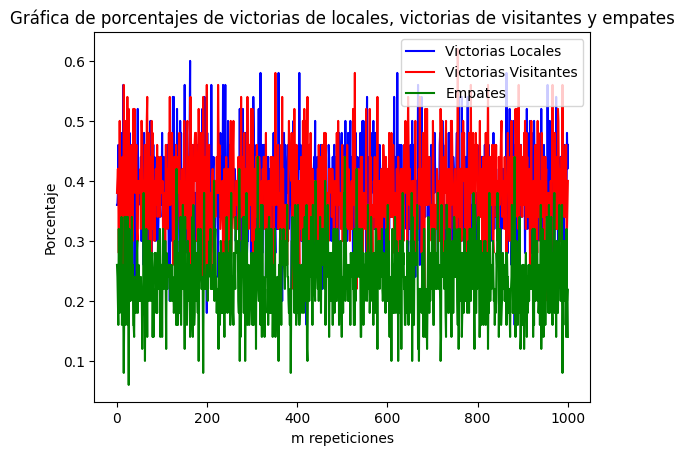

In [39]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P1L, label='Victorias Locales', color='b')
plt.plot(x, P1V, label='Victorias Visitantes', color='r')
plt.plot(x, P1E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 2 ( PACHUCA VS NECAXA ) :**

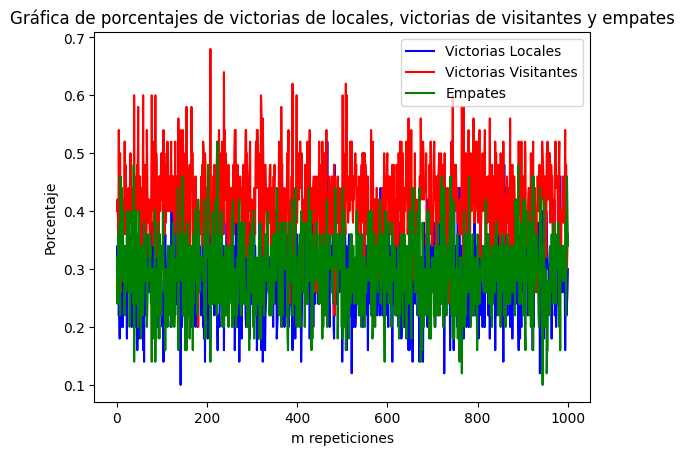

In [40]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P2L, label='Victorias Locales', color='b')
plt.plot(x, P2V, label='Victorias Visitantes', color='r')
plt.plot(x, P2E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 3 ( MONTERREY VS ATLAS) :**

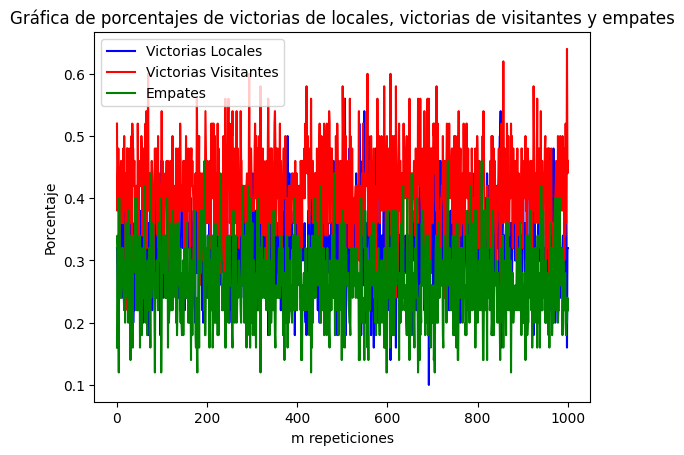

In [41]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P3L, label='Victorias Locales', color='b')
plt.plot(x, P3V, label='Victorias Visitantes', color='r')
plt.plot(x, P3E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 4 ( GUADALAJARA VS PUMAS ) :**

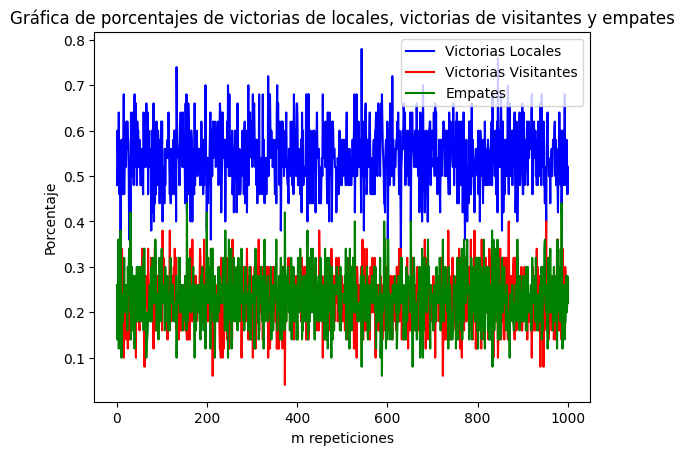

In [42]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P4L, label='Victorias Locales', color='b')
plt.plot(x, P4V, label='Victorias Visitantes', color='r')
plt.plot(x, P4E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 5 ( TOLUCA VS LEÓN ) :**

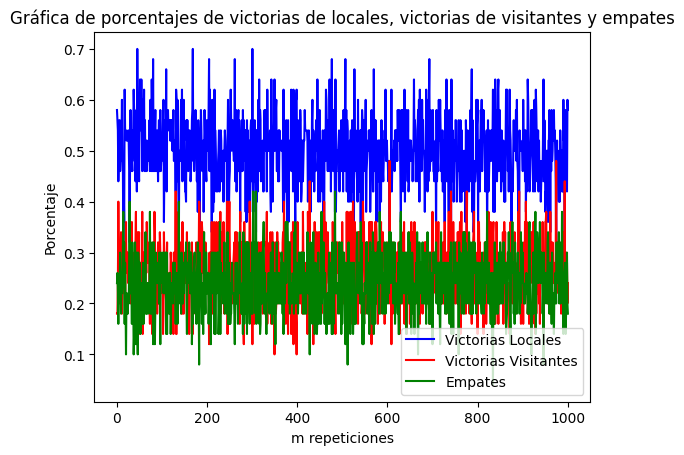

In [43]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P5L, label='Victorias Locales', color='b')
plt.plot(x, P5V, label='Victorias Visitantes', color='r')
plt.plot(x, P5E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 6 ( SAN LUIS VS PUEBLA ) :**

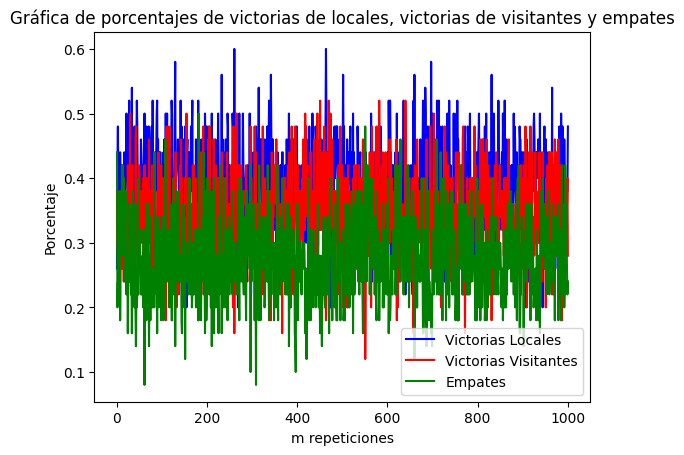

In [44]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P6L, label='Victorias Locales', color='b')
plt.plot(x, P6V, label='Victorias Visitantes', color='r')
plt.plot(x, P6E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 7 ( TIJUANA VS TIGRES ) :**

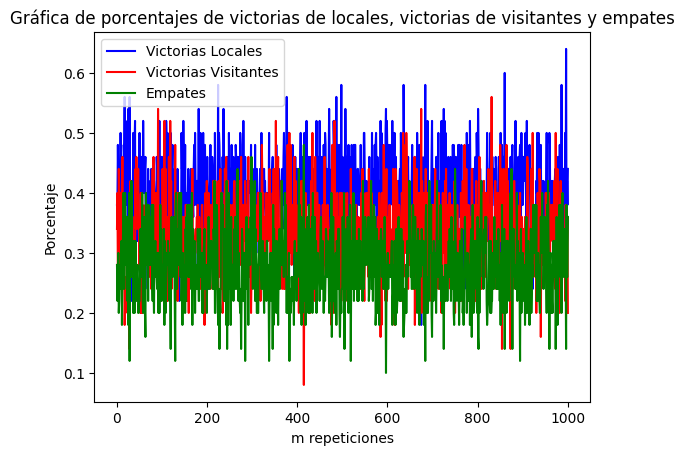

In [45]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P7L, label='Victorias Locales', color='b')
plt.plot(x, P7V, label='Victorias Visitantes', color='r')
plt.plot(x, P7E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 8 ( MAZATLAN VS AMERICA ) :**

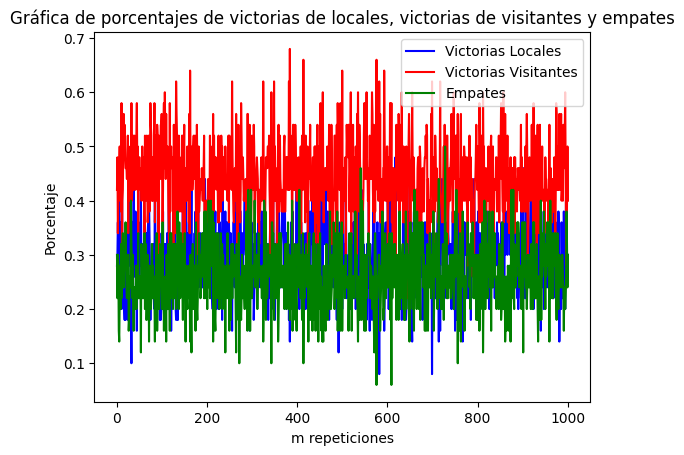

In [46]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P8L, label='Victorias Locales', color='b')
plt.plot(x, P8V, label='Victorias Visitantes', color='r')
plt.plot(x, P8E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()

# **RESULTADOS PARTIDO 9 ( QUERETARO VS JUAREZ ) :**

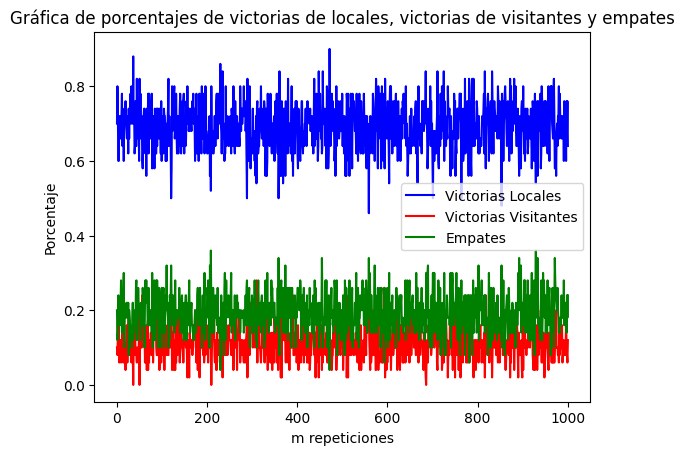

In [47]:
# Graficar los porcentajes de victorias de locales, victorias de visitantes y empates
plt.plot(x,P9L, label='Victorias Locales', color='b')
plt.plot(x, P9V, label='Victorias Visitantes', color='r')
plt.plot(x, P9E, label='Empates', color='g')
plt.xlabel("m repeticiones")
plt.ylabel('Porcentaje')
plt.title('Gráfica de porcentajes de victorias de locales, victorias de visitantes y empates')
plt.legend()
# Mostrar la gráfica
plt.show()